In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\biswa\\Downloads\\Datasets-2025-08-08\\news_events_cleaned.csv")
df.head(5)

,event_id,event_type,summary,category,found_at,confidence,article_sentence,human_approved,planning,amount,...,company_id,company_name,company_domain,company_ticker,article_id,article_title,article_url,article_published_at,article_body,article_author
0,0020f127-3470-4cce-8989-1c79f45da217,news_event,Unipart Manufacturing Group recognized as Tran...,recognized_as,2022-07-10 20:00:00,0.8759,In addition to being named the safest organisa...,False,False,NaN,...,000bd323-1bf8-5c7a-9941-e6c155c29d10,Unipart Manufacturing Group,unipart.com,NaN,d172abc1-3755-4cef-946e-7de944806e7d,Unipart ranked the safest organisation in the ...,https://www.unipart.com/unipart-ranked-the-saf...,2022-07-10 20:00:00,Unipart has been further recognised for its un...,NaN
1,009be1ff-6cfb-4e9f-a415-69baf71f47f3,news_event,OOS International received award two safety aw...,receives_award,2019-12-19 10:45:17,0.9497,Since then OOS International has been an activ...,False,False,NaN,...,000ff896-4292-5b15-9c81-8bf4d76c10d7,OOS International,oosinternational.com,NaN,58c0d5fd-068d-4bab-8ac4-47e19bbdf091,OOS International Award for completing another...,https://www.oosinternational.com/oos-news/awar...,2019-12-19 10:45:17,"On behalf of CIM OOS Tiradentes, Mr Jose Marci...",admin
2,01444124-7375-4f03-8879-eb8200b31504,news_event,NWN Corporation received award Global Winner f...,receives_award,2022-07-12 20:00:00,0.6887,"As a result, with nearly 400 nominees from ove...",False,False,NaN,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,NWN Corporation,nwncarousel.com,NaN,ef330a38-8624-41c1-8b75-d1b96e7dbd45,Skyrocketing Employee Engagement with Microsof...,https://nwncarousel.com/blog/skyrocketing-empl...,2022-07-12 22:00:00,More than 270 million people rely on Teams for...,NaN
3,031a304c-29ca-415e-a815-e9c915896540,news_event,Grape Solutions Plc. is developing Mobiliti ap...,is_developing,2023-04-02 22:00:00,0.5987,MVM Mobiliti and Grape Solutions have been wor...,False,False,NaN,...,0008b75f-9d15-54ae-b70a-52301945e397,Grape Solutions Plc.,grape.solutions,NaN,0525807d-6ff6-44a0-9c36-8be3afceba5b,Hungarian development makes electric vehicle c...,https://www.iqfin.net/technology/hungarian-dev...,2023-04-02 22:00:00,Grape Solutions and MVM Mobiliti partner with ...,NaN
4,037783ca-f3f7-4782-8a81-df3cae1ac936,news_event,"NWN Corporation launched two new kits, At-Home...",launches,2022-04-13 01:02:36,0.7180,"NWN Carousel, the leading integrated cloud com...",False,False,NaN,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,NWN Corporation,nwncarousel.com,NaN,16061c55-111d-496a-9e3e-837dddc3454b,NWN Carousel Launches Two Hybrid Work Solution...,https://www.businesswire.com/news/home/2022041...,2022-04-13 03:00:00,"NWN Carousel, the leading integrated cloud com...",NaN


### Data Quality Analysis

**1. Data Quality Dimension Assessment:**

- Analyze and report on at least five major data quality dimensions (accuracy, completeness, consistency, timeliness, uniqueness, validity).
- For each dimension:
    - Define what it means in the context of your dataset.
    - Quantify the current level of data quality using appropriate metrics (e.g., % completeness, duplicate rates, validity checks).
    - Provide real examples from the dataset (show sample records, issues).
- Document your approach and logic for each metric/dimension assessed.

Accuracy

Definition:
Data values correctly describe the real-world entities or events they represent.
For example — the article_url should be a reachable, correct URL; confidence values should be between 0 and 1.

In [3]:
# Accuracy check for confidence values
invalid_confidence = df[(df['confidence'] < 0) | (df['confidence'] > 1)]
accuracy_rate = 100 * (1 - len(invalid_confidence) / len(df))

print(f"✅ Accuracy (Confidence Score Validity): {accuracy_rate:.2f}%")
print("Invalid confidence samples:")
display(invalid_confidence[['event_id', 'confidence']].head())


✅ Accuracy (Confidence Score Validity): 100.00%
Invalid confidence samples:


,event_id,confidence


Completeness

Definition:
Measures the extent to which all required fields are populated.

Approach:

Compute % of non-missing values per column.

Identify columns with low completeness (<70%).

📊 Completeness Summary:


,Column,Completeness %
0,headcount,1.016952
1,amount_normalized,6.735573
2,amount,6.736226
3,article_author,14.083308
4,company_ticker,21.813154
5,location,27.436818
6,effective_date,39.787244
7,company_name,97.573053
8,company_id,97.590511
9,company_domain,97.590511


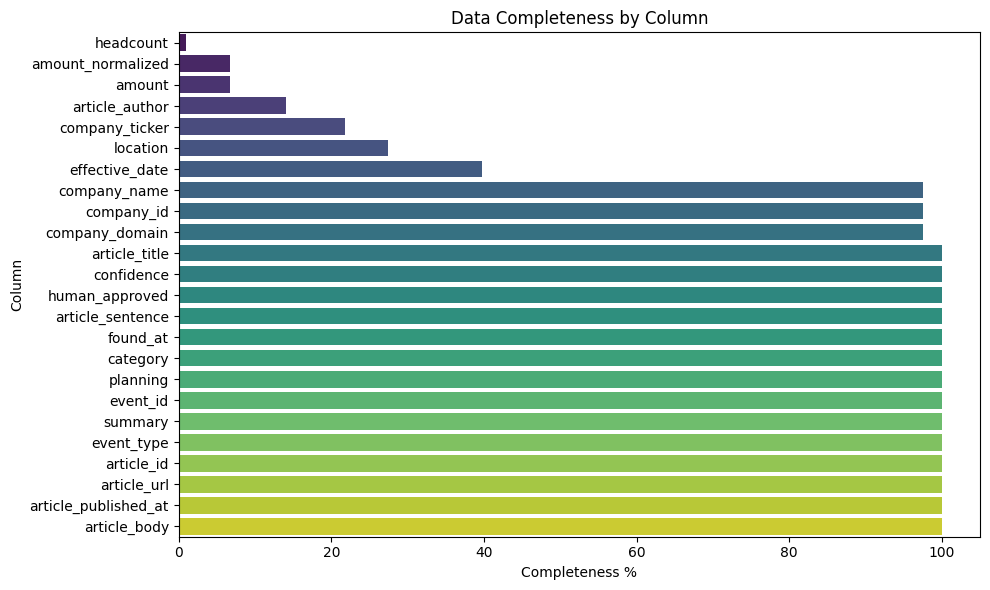

In [7]:
completeness = df.notnull().mean() * 100
completeness_df = completeness.sort_values(ascending=True).reset_index()
completeness_df.columns = ['Column', 'Completeness %']

print("📊 Completeness Summary:")
display(completeness_df.head(10))

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=completeness_df, y='Column', x='Completeness %', hue='Column', legend=False, palette='viridis')
plt.title("Data Completeness by Column")
plt.tight_layout()
plt.show()


Consistency

Definition:
Data values should not contradict each other and must follow the same format or rules across records.

Approach:

Check for uniform date formats.

Ensure boolean fields (human_approved, planning) contain only valid values (True/False).

Ensure all event categories are from the known list.

In [8]:
# Date format consistency
inconsistent_dates = df[~df['found_at'].astype(str).str.match(r'\d{4}-\d{2}-\d{2}')]
print(f"❌ Inconsistent 'found_at' formats: {len(inconsistent_dates)}")

# Boolean consistency check
bool_check = df[['human_approved', 'planning']].apply(lambda x: x.isin([True, False, 0, 1]).all())
print("✅ Boolean consistency:", bool_check.to_dict())

# Category consistency
valid_categories = [
    'recognized_as', 'receives_award', 'is_developing', 'launches',
    'receives_financing', 'hires', 'partners_with', 'attends_event',
    'invests_into_assets', 'promotes', 'expands_offices_to', 'acquires',
    'sells_assets_to', 'leaves', 'signs_new_client', 'closes_offices_in',
    'files_suit_against', 'invests_into', 'expands_facilities', 'retires_from',
    'opens_new_location', 'merges_with', 'has_issues_with', 'integrates_with',
    'identified_as_competitor_of', 'goes_public', 'increases_headcount_by',
    'decreases_headcount_by', 'expands_offices_in'
]
invalid_category = df[~df['category'].isin(valid_categories)]
print(f"❌ Invalid categories found: {len(invalid_category)}")


❌ Inconsistent 'found_at' formats: 0
✅ Boolean consistency: {'human_approved': True, 'planning': True}
❌ Invalid categories found: 0


Timeliness

Definition:
Data is current and available when needed.
For Firmable, found_at and article_published_at indicate event recency.

Approach:

Calculate age of each record.

Check proportion of records from the last 12 months

In [9]:
df['found_at'] = pd.to_datetime(df['found_at'], errors='coerce')
recent_records = df[df['found_at'] > pd.Timestamp.now() - pd.DateOffset(years=1)]

timeliness_rate = 100 * len(recent_records) / len(df)
print(f"🕒 Timeliness (records within last 12 months): {timeliness_rate:.2f}%")


🕒 Timeliness (records within last 12 months): 8.91%


Uniqueness

Definition:
Each entity or event should be recorded once — no duplicates.

Approach:

Check for duplicate event IDs or repeated (company + event_type + summary) combinations.

In [10]:
duplicate_events = df.duplicated(subset=['event_id'])
duplicate_rate = 100 * duplicate_events.sum() / len(df)

print(f"🔁 Duplicate Event Rate: {duplicate_rate:.2f}%")

# Show examples
display(df[duplicate_events].head())


🔁 Duplicate Event Rate: 0.00%


,event_id,event_type,summary,category,found_at,confidence,article_sentence,human_approved,planning,amount,...,company_id,company_name,company_domain,company_ticker,article_id,article_title,article_url,article_published_at,article_body,article_author


Validity

Definition:
Values must conform to specified business rules or formats.

Approach:

Validate email/URL patterns, numeric ranges, and date fields.

In [11]:
# URL validity (using regex, assuming you already checked status)
url_valid = df['article_url'].str.match(r'^https?:\/\/')
validity_rate = 100 * url_valid.mean()
print(f"🌐 URL Format Validity: {validity_rate:.2f}%")


🌐 URL Format Validity: 100.00%
